In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

In [5]:
raw_welfare = pd.DataFrame(raw_welfare)

In [6]:
welfare = raw_welfare.copy()

In [7]:
welfare = welfare.rename(columns = {'h14_g3' : 'sex',
                         'h14_g4' : 'birth',
                         'h14_g10' : 'marriage_type',
                         'h14_g11' : 'religion',
                         'p1402_8aq1' : 'income',
                         'h14_eco9' : 'code_job',
                         'h14_reg7' : 'code_region'})

### 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

In [8]:
welfare['religion'].dtypes

dtype('float64')

In [9]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

In [10]:
welfare['religion'] = np.where(welfare['religion'] == 1 , 'yes' , 'no')

In [11]:
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

<AxesSubplot:xlabel='religion', ylabel='count'>

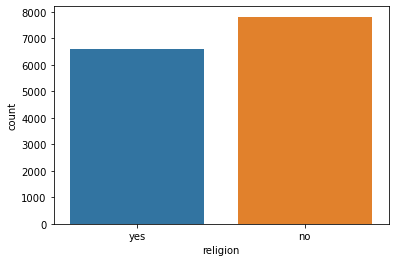

In [12]:
sns.countplot(data = welfare, x = 'religion')

In [13]:
welfare['marriage_type'].dtypes

dtype('float64')

In [14]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

In [17]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1 , 'marriage',
                              np.where(welfare['marriage_type'] == 3 , 'divorce','etc'))

In [18]:
n_divorce = welfare.groupby('marriage',as_index = False)\
                    .agg(n = ('marriage','count'))

In [19]:
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<AxesSubplot:xlabel='marriage', ylabel='n'>

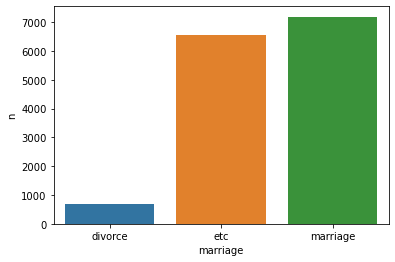

In [20]:
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

In [25]:
red_div = welfare.query('marriage != "etc"') \
                .groupby('religion',as_index = False) \
                ['marriage'] \
                .value_counts(normalize = True)

In [27]:
red_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [28]:
red_div = red_div.query('marriage == "divorce"') \
                .assign(proportion = red_div['proportion']*100) \
                .round(1)

In [29]:
red_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<AxesSubplot:xlabel='religion', ylabel='proportion'>

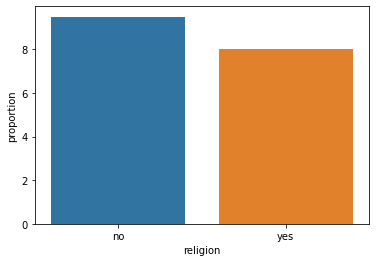

In [30]:
sns.barplot(data = red_div, x= 'religion', y= 'proportion')

In [31]:
welfare = welfare.assign(age = 2019 - welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [32]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',np.where(welfare['age'] < 60 , 'middle','old')))

In [34]:
age_div = welfare.query('marriage != "etc"') \
                .groupby('ageg',as_index= False) \
                ['marriage'] \
                .value_counts(normalize = True)

In [36]:
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [37]:
age_div = age_div.query('marriage == "divorce"') \
                .assign(proportion = age_div['proportion']*100) \
                .round(1)

In [38]:
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6
5,young,divorce,5.0


<AxesSubplot:xlabel='ageg', ylabel='proportion'>

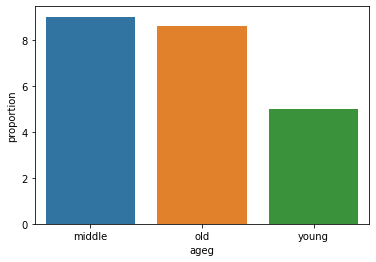

In [39]:
sns.barplot(data = age_div , x = 'ageg', y='proportion')

In [40]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                    .groupby(['ageg','religion'],as_index = False) \
                    ['marriage'] \
                    .value_counts(normalize = True)
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [41]:
age_rel_div = \
        age_rel_div.query('marriage == "divorce"') \
                    .assign(proportion = age_rel_div['proportion']*100) \
                    .round(1)
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<AxesSubplot:xlabel='ageg', ylabel='proportion'>

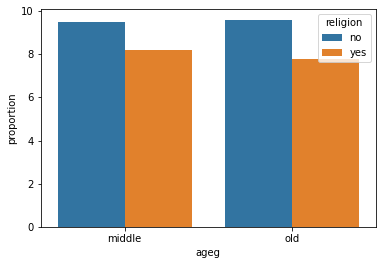

In [42]:
sns.barplot(data = age_rel_div , x = 'ageg' , y = 'proportion', hue = 'religion')

### 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

In [43]:
welfare['code_region'].dtypes

dtype('float64')

In [44]:
welfare['code_region'].value_counts()

2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

In [48]:
list_region = pd.DataFrame({'code_region' : [1,2,3,4,5,6,7],
                            'region' : ['서울',
                                       '수도권(인천/경기)',
                                       '부산/경남/울산',
                                       '대구/경북',
                                       '대전/충남',
                                       '강원/충북',
                                       '광주/전남/전북/제주도']})

In [49]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')

In [50]:
welfare[['code_region','region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [53]:
region_ageg = welfare.groupby('region',as_index = False) \
                    ['ageg'] \
                    .value_counts(normalize = True)

In [55]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion']*100).round(1)

In [56]:
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


In [58]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})  ##한국어로 그래프

<AxesSubplot:xlabel='proportion', ylabel='region'>

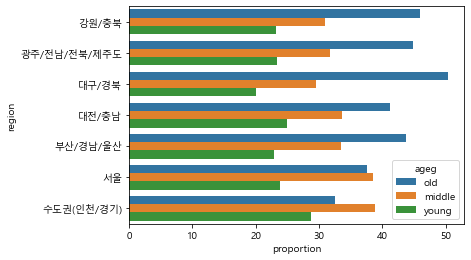

In [59]:
sns.barplot(data = region_ageg , y = 'region', x = 'proportion', hue = 'ageg')

In [60]:
pivot_df = region_ageg[['region','ageg','proportion']].pivot(index = 'region',
                                                            columns = 'ageg',
                                                            values = 'proportion')

In [61]:
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<AxesSubplot:ylabel='region'>

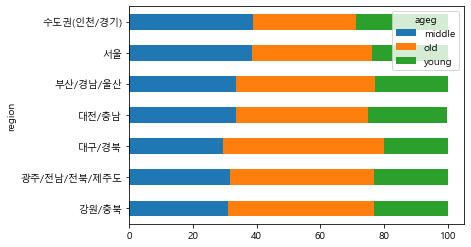

In [62]:
pivot_df.plot.barh(stacked = True)

In [63]:
#노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young','middle','old']]

In [64]:
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<AxesSubplot:ylabel='region'>

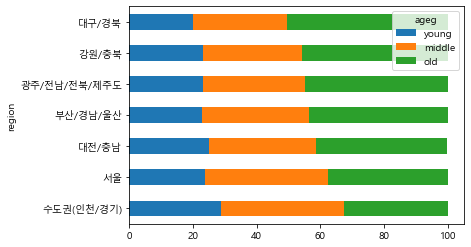

In [65]:
reorder_df.plot.barh(stacked = True)